Gabriel Baranes CS 577 HW3


# - Multiclass classification

In [19]:
from keras import models
from keras.datasets import mnist
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

 Importing the dataset

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [63]:
print("shape de x_train",x_train.shape)
print("shape de x_test",x_test.shape)
print("")
print("shape de y_train",y_train.shape)
print("shape de y_test",y_test.shape)

shape de x_train (50000, 32, 32, 3)
shape de x_test (10000, 32, 32, 3)

shape de y_train (50000, 1)
shape de y_test (10000, 1)


3 classes

In [64]:
subset_ytrain=[]
subset_xtrain=[]
c=0
for i in y_train:
    if i==0 or i==1 or i==2:
        subset_ytrain.append(i)
        subset_xtrain.append(x_train[c])
    c=c+1
        
sub_ytrain=np.array(subset_ytrain)
sub_xtrain=np.array(subset_xtrain)

subset_ytest=[]
subset_xtest=[]
c=0
for i in y_test:
    if i==0 or i==1 or i==2:
        subset_ytest.append(i)
        subset_xtest.append(x_test[c])
    c=c+1
        
sub_ytest=np.array(subset_ytest)
sub_xtest=np.array(subset_xtest)

print("sub_ytrain.shape=",sub_ytrain.shape)
print("sub_ytest.shape=",sub_ytest.shape)
print("")
print("sub_xtrain.shape=",sub_xtrain.shape)
print("sub_xtest.shape=",sub_xtest.shape)

sub_ytrain.shape= (15000, 1)
sub_ytest.shape= (3000, 1)

sub_xtrain.shape= (15000, 32, 32, 3)
sub_xtest.shape= (3000, 32, 32, 3)


 Vectorizing

In [65]:
sub_xtrain = sub_xtrain.reshape(len(sub_xtrain), 32* 32* 3)/256
sub_xtest = sub_xtest.reshape(len(sub_xtest), 32 * 32 * 3)/256

In [66]:
print("sub_xtrain.shape=",sub_xtrain.shape)
print("sub_xtest.shape=",sub_xtest.shape)

sub_xtrain.shape= (15000, 3072)
sub_xtest.shape= (3000, 3072)


 One Hot Encoding

In [67]:
a = tf.keras.utils.to_categorical(sub_ytrain, num_classes=3)
encoded_sub_ytrain= tf.constant(a)

encoded_sub_ytrain=np.array(encoded_sub_ytrain)

In [68]:
print("encoded_sub_ytrain shape=",encoded_sub_ytrain.shape)
print(encoded_sub_ytrain)

encoded_sub_ytrain shape= (15000, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [69]:
b = tf.keras.utils.to_categorical(sub_ytest, num_classes=3)
encoded_sub_ytest= tf.constant(b)

encoded_sub_ytest=np.array(encoded_sub_ytest)

In [70]:
print("encoded_sub_ytest shape=",encoded_sub_ytest.shape)
print(encoded_sub_ytest)

encoded_sub_ytest shape= (3000, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


# CATEGORICAL_CROSSENTROPY LOSS

 Choosing hyperparameters of the Neural Network Design

size layer1= 128


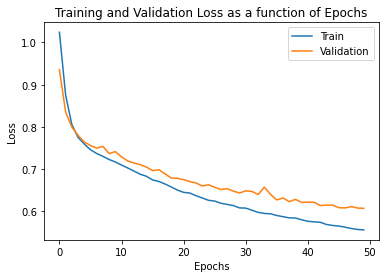

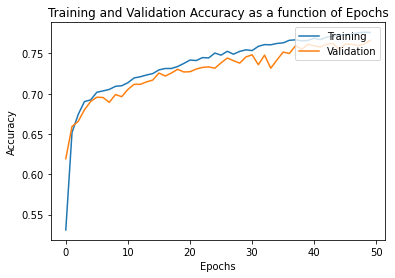

size layer1= 256


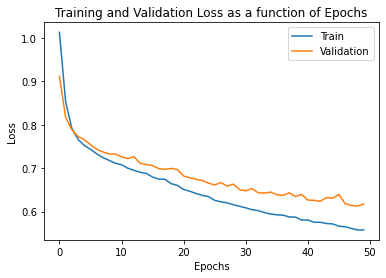

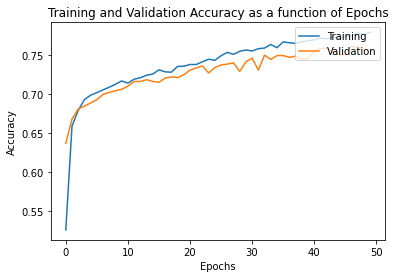

size layer1= 512


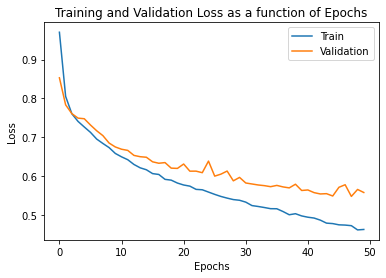

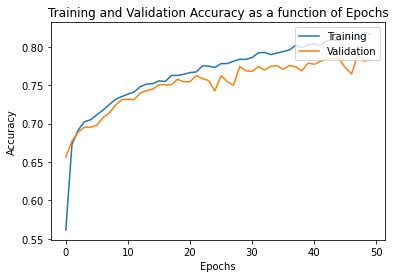

size layer1= 1024


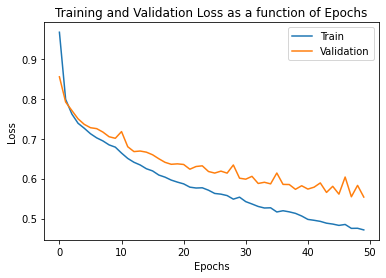

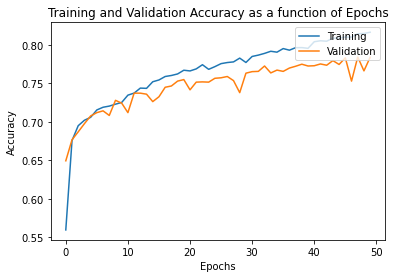

In [41]:
X=[128,256,512,1024] #I try different size for the layer one to see wich one is the best 

for i in X:
    print("size layer1=",i)
    model=models.Sequential()
    model.add(layers.Dense(i, activation='sigmoid'))
    model.add(layers.Dense(3, activation="softmax"))
    model.compile(optimizer="adam",loss='categorical_crossentropy',metrics='categorical_accuracy')
    history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=50,validation_split=0.2,verbose=0)
    
    #plot of the training and validation loss as a function of epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation Loss as a function of Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


    #Plot of the training and validation accuracy as a function of epochs
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Training and Validation Accuracy as a function of Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

Optimizer:

In [112]:
from keras import optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [72]:
sgd=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ada=optimizers.Adagrad(learning_rate=0.01,epsilon=None, decay=0.0)

# SGD with CATEGORICAL_CROSSENTROPY LOSS

In [113]:
model=models.Sequential()

model.add(layers.Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
#model.add(Activation("tanh"))
model.add(Dropout(0.5))

model.add(layers.Dense(3, activation="softmax"))
model.add(BatchNormalization())
#model.add(Activation("tanh"))


model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics='categorical_accuracy')

history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

In [114]:
model=models.Sequential()
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics='categorical_accuracy')

history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

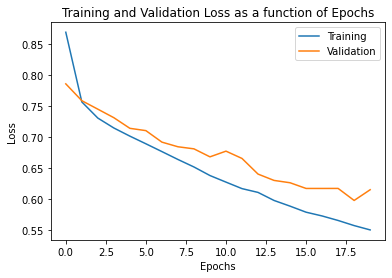

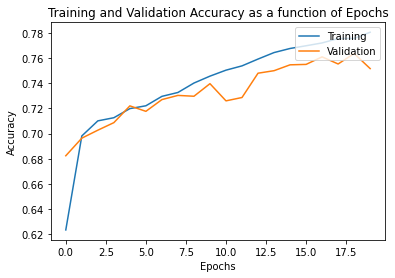

In [106]:
#plot of the training and validation loss as a function of epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss as a function of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


#Plot of the training and validation accuracy as a function of epochs
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy as a function of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [107]:
model=models.Sequential()
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics='categorical_accuracy')

model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

results = model.evaluate(sub_xtest, encoded_sub_ytest)
print(results)

94/94 [==============================] - 0s 3ms/step - loss: 0.5897 - categorical_accuracy: 0.7677
[0.5897076725959778, 0.7676666378974915]


# ADAM with CATEGORICAL_CROSSENTROPY LOSS

In [87]:
model=models.Sequential()
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=ada,loss='categorical_crossentropy',metrics='categorical_accuracy')

history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

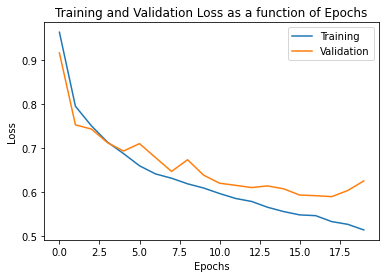

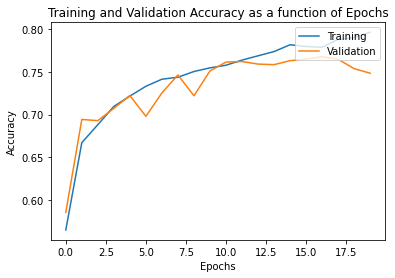

In [88]:
#plot of the training and validation loss as a function of epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss as a function of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


#Plot of the training and validation accuracy as a function of epochs
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy as a function of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [90]:
model=models.Sequential()
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=ada,loss='categorical_crossentropy',metrics='categorical_accuracy')

model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

results = model.evaluate(sub_xtest, encoded_sub_ytest)
print(results)

94/94 [==============================] - 0s 3ms/step - loss: 0.5579 - categorical_accuracy: 0.7737
[0.5578991174697876, 0.7736666798591614]


# Kullback_Leibler_divergence Loss

hyperparameter

size layer1= 128


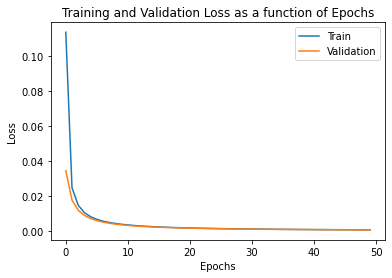

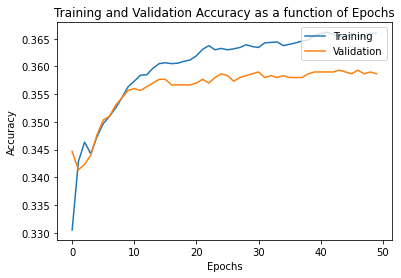

size layer1= 256


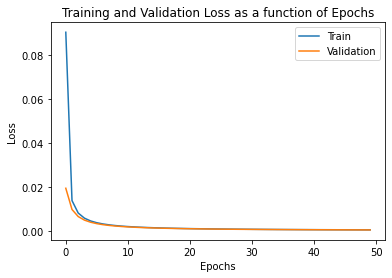

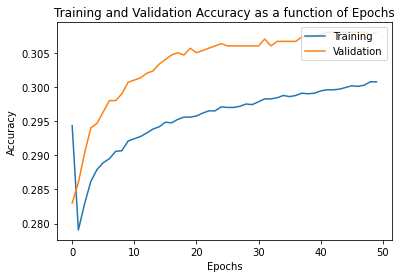

size layer1= 512


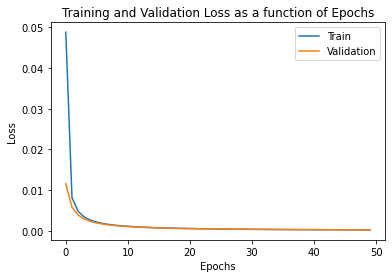

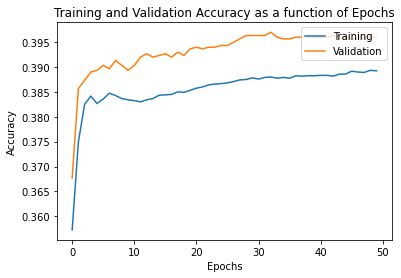

size layer1= 1024


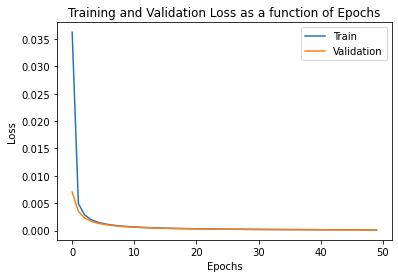

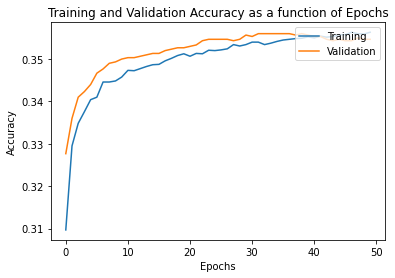

In [93]:
X=[128,256,512,1024] #I try different size for the layer one to see wich one is the best 
#X=[128]
for i in X:
    print("size layer1=",i)
    model=models.Sequential()
    model.add(layers.Dense(i, activation='sigmoid'))
    model.add(layers.Dense(3, activation="softmax"))
    model.compile(optimizer="sgd",loss='kullback_leibler_divergence',metrics='categorical_accuracy')
    history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=50,validation_split=0.2,verbose=0)
    
    #plot of the training and validation loss as a function of epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation Loss as a function of Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()


    #Plot of the training and validation accuracy as a function of epochs
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Training and Validation Accuracy as a function of Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

# SGD with Kullback_Leibler_divergence Loss

In [94]:
model=models.Sequential()
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=sgd,loss='kullback_leibler_divergence',metrics='categorical_accuracy')

history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

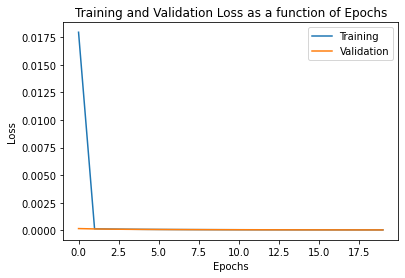

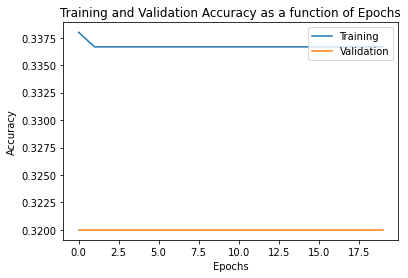

In [95]:
#plot of the training and validation loss as a function of epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss as a function of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


#Plot of the training and validation accuracy as a function of epochs
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy as a function of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [101]:
model=models.Sequential()
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=sgd,loss='kullback_leibler_divergence',metrics='categorical_accuracy')

model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

results = model.evaluate(sub_xtest, encoded_sub_ytest)
print(results)

94/94 [==============================] - 1s 7ms/step - loss: 0.6274 - categorical_accuracy: 0.7490
[0.6273995637893677, 0.7490000128746033]


# ADAM with Kullback_Leibler_divergence Loss

In [102]:
model=models.Sequential()
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer=ada,loss='kullback_leibler_divergence',metrics='categorical_accuracy')

history = model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

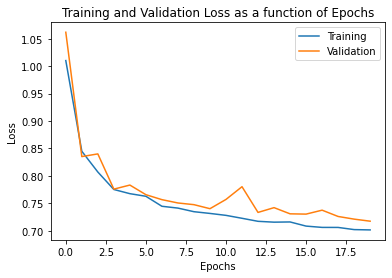

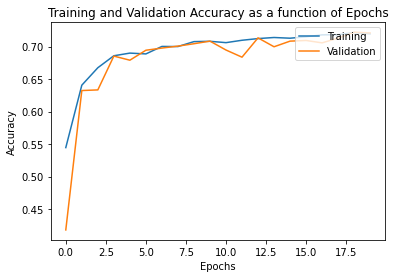

In [103]:
#plot of the training and validation loss as a function of epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss as a function of Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


#Plot of the training and validation accuracy as a function of epochs
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and Validation Accuracy as a function of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [104]:
model=models.Sequential()
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dense(3, activation="softmax"))

model.compile(optimizer="adam",loss='kullback_leibler_divergence',metrics='categorical_accuracy')

model.fit(sub_xtrain,encoded_sub_ytrain,batch_size=100,epochs=20,validation_split=0.2,verbose=0)

results = model.evaluate(sub_xtest, encoded_sub_ytest)
print(results)

94/94 [==============================] - 1s 7ms/step - loss: 0.4979 - categorical_accuracy: 0.7963
[0.4978565275669098, 0.7963333129882812]


In [20]:
model.save_weights(filepath="HW3_partie_code")